|Challenge Set       |**6 **                    |
|-------------------:|:-------------------------|
|Topic:              |Classification Errors     |
|Date:               |08/06/2016                | 
|Name:               |Bryant Biggs              |
|Worked with:        |N/A                       |
---
# WRITTEN FOR PYTHON 3
### Table of Contents:
 - [**Challenge 1**](#1)
 - [**Challenge 2**](#2)
 - [**Challenge 3**](#3)
 - [**Challenge 4**](#4)
 - [**Challenge 5**](#5)
---

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import os
import urllib.request 

import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# default plot stying changes
import seaborn as sns
sns.set_style("white")
sns.set_context("poster", font_scale=1., rc={"lines.linewidth": 2.5})
sns.set_palette("Set2")
colors = sns.color_palette('Set2',12)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data
data = 'house-votes-84.data'
names = 'house-votes-84.names'
base_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/'

files = [data, names]

# download files if they do not exist
for file in files:
    if not os.path.isfile('{0}'.format(file)):
        _ = urllib.request.urlretrieve('{0}/{1}'.format(base_url, file), '{0}'.format(file))

In [3]:
# name columns
columns =  ['class', 'infants', 'water', 'budget', 'freeze', 'salvador', 'relig', 'anti-sat', 'nic-aid', 
            'missile', 'immig', 'synfuels', 'educ', 'su-fund', 'crime', 'duty-free', 'africa']

# load dataset
df = pd.read_csv(data, sep=',', names=columns)

# replace y's and n's with 1, 0
df = df.replace(['y', 'n'], [1, 0]) 

# replace replublican, democrat with 1,0
df = df.replace('republican',1)
df = df.replace('democrat',0)

In [4]:
# find majority vote average and replace '?' with majority vote average (1, 0)
for col in columns[1:]:
    df_temp = df[col].value_counts().to_frame()
    ones = int(df_temp.iloc[1])
    zeros = int(df_temp.iloc[0])
    avg = int(round(ones/(ones+zeros), 0))
    df[col] = df[col].replace('?', avg)

In [5]:
# split dataset into test, train
train, test = train_test_split(df, test_size = 0.30, random_state=4444)

data_cols = columns[1:]
label_cols = columns[0]

train_data = train[data_cols]
train_labels = train[label_cols]

test_data = test[data_cols]
test_labels = test[label_cols]

# <a id='1'></a>Challenge 1:
For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [6]:
knn_clf = KNeighborsClassifier()
knn_mdl = knn_clf.fit(train_data, train_labels)

print('KNN accuracy score: {0:.2f}%'.format(accuracy_score(test_labels, knn_mdl.predict(test_data))*100))
print('KNN classification report:')
print(classification_report(test_labels, knn_mdl.predict(test_data)))

KNN accuracy score: 91.60%
KNN classification report:
             precision    recall  f1-score   support

          0       0.93      0.92      0.93        77
          1       0.89      0.91      0.90        54

avg / total       0.92      0.92      0.92       131



In [7]:
logr_clf = LogisticRegression()
logr_mdl = logr_clf.fit(train_data, train_labels)

print('Logistic regression accuracy: {0:.2f}%'.format(accuracy_score(test_labels, logr_mdl.predict(test_data))*100))
print('Logistic regression classification report:')
print(classification_report(test_labels, logr_mdl.predict(test_data)))

Logistic regression accuracy: 93.13%
Logistic regression classification report:
             precision    recall  f1-score   support

          0       0.93      0.96      0.94        77
          1       0.94      0.89      0.91        54

avg / total       0.93      0.93      0.93       131



In [8]:
bayes_clf = GaussianNB()
bayes_mdl = bayes_clf.fit(train_data, train_labels)

print('GaussianNB accuracy: {0:.2f}%'.format(accuracy_score(test_labels, bayes_mdl.predict(test_data))*100))
print('GaussianNB classification report:')
print(classification_report(test_labels, bayes_mdl.predict(test_data)))

GaussianNB accuracy: 94.66%
GaussianNB classification report:
             precision    recall  f1-score   support

          0       0.94      0.97      0.96        77
          1       0.96      0.91      0.93        54

avg / total       0.95      0.95      0.95       131



In [9]:
svc_clf = SVC(probability=True)
svc_mdl = svc_clf.fit(train_data, train_labels)

print('SVC accuracy: {0:.2f}%'.format(accuracy_score(test_labels, svc_mdl.predict(test_data))*100))
print('SVC classification report:')
print(classification_report(test_labels, svc_mdl.predict(test_data)))

SVC accuracy: 95.42%
SVC classification report:
             precision    recall  f1-score   support

          0       0.95      0.97      0.96        77
          1       0.96      0.93      0.94        54

avg / total       0.95      0.95      0.95       131



In [10]:
dtree_clf = DecisionTreeClassifier()
dtree_mdl = dtree_clf.fit(train_data, train_labels)

print('Decision tree accuracy: {0:.2f}%'.format(accuracy_score(test_labels, dtree_mdl.predict(test_data))*100))
print('Decision tree classification report:')
print(classification_report(test_labels, dtree_mdl.predict(test_data)))

Decision tree accuracy: 93.13%
Decision tree classification report:
             precision    recall  f1-score   support

          0       0.93      0.96      0.94        77
          1       0.94      0.89      0.91        54

avg / total       0.93      0.93      0.93       131



In [11]:
rforest_clf = RandomForestClassifier()
rforest_mdl = rforest_clf.fit(train_data, train_labels)

print('Random forrest accuracy: {0:.2f}%'.format(accuracy_score(test_labels, rforest_mdl.predict(test_data))*100))
print('Random forrest classification report:')
print(classification_report(test_labels, rforest_mdl.predict(test_data)))

Random forrest accuracy: 92.37%
Random forrest classification report:
             precision    recall  f1-score   support

          0       0.90      0.97      0.94        77
          1       0.96      0.85      0.90        54

avg / total       0.93      0.92      0.92       131



## Answer for Challenge 1 is:
<br>
<font color='blue'>Results shown above</font>

___

# <a id='2'></a>Challenge 2:
For each, draw the ROC curve and calculate the AUC.

In [12]:
# don't repeat yourself dummy
mdls = [knn_mdl, logr_mdl, bayes_mdl, svc_mdl, dtree_mdl, rforest_mdl]
names = ['KNN', 'Logistic Regression', 'Bayes', 'SVC', 'Decision Tree', 'Random Forrest']
mdl_tup = list(zip(mdls, names))

In [13]:
# calculate AUC values
for mdl in mdl_tup:
    y_true = test_labels
    y_score = mdl[0].predict_proba(test_data)[:,1]
    fpr, tpr, _ = roc_curve(y_true, y_score)
    print('{0} AUC: {1:.2f}%'.format(mdl[1], auc(fpr, tpr)*100))

KNN AUC: 94.75%
Logistic Regression AUC: 98.70%
Bayes AUC: 94.13%
SVC AUC: 99.33%
Decision Tree AUC: 92.50%
Random Forrest AUC: 99.00%


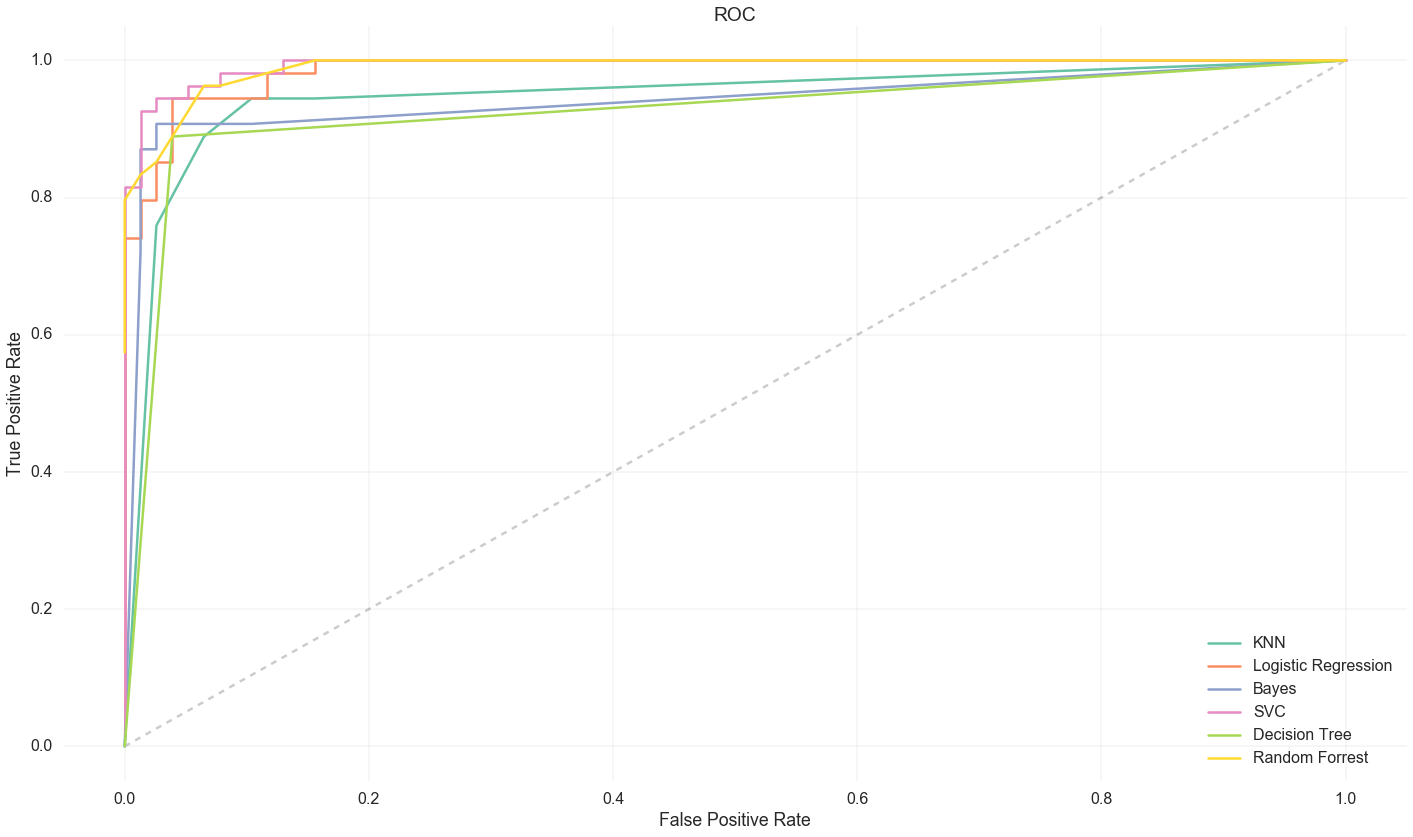

In [14]:
# make figure
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)

# plots
ax.plot([0, 1], 'k--', alpha=0.2)
for i,mdl in enumerate(mdl_tup):
    y_true = test_labels
    y_score = mdl[0].predict_proba(test_data)[:,1]
    fpr, tpr, _ = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr, color=colors[i], label='{0}'.format(mdl[1]))

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

# labels/titles
plt.legend(loc="best")
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.xaxis.grid(True, alpha=0.2) 
ax.yaxis.grid(True, alpha=0.2) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

## Answer for Challenge 2 is:

<font color='blue'>Shown above</font><br>

___

# <a id='3'></a>Challenge 3:
Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [15]:
for mdl in mdl_tup:
    print('{0} accuracy score: {1:.2f}%'.format(mdl[1], np.mean(cross_val_score(mdl[0], 
                                                    test_data, test_labels))*100))
    print('{0} recall score: {1:.2f}%'.format(mdl[1], np.mean(cross_val_score(mdl[0], 
                                                    test_data, test_labels, scoring='recall'))*100))
    print('{0} precision score: {1:.2f}%'.format(mdl[1], np.mean(cross_val_score(mdl[0], 
                                                    test_data, test_labels, scoring='precision'))*100))
    print('-'*80)

KNN accuracy score: 91.61%
KNN recall score: 92.59%
KNN precision score: 88.35%
--------------------------------------------------------------------------------
Logistic Regression accuracy score: 92.37%
Logistic Regression recall score: 90.74%
Logistic Regression precision score: 91.02%
--------------------------------------------------------------------------------
Bayes accuracy score: 91.63%
Bayes recall score: 90.74%
Bayes precision score: 89.65%
--------------------------------------------------------------------------------
SVC accuracy score: 91.61%
SVC recall score: 90.74%
SVC precision score: 89.27%
--------------------------------------------------------------------------------
Decision Tree accuracy score: 93.90%
Decision Tree recall score: 90.74%
Decision Tree precision score: 89.64%
--------------------------------------------------------------------------------
Random Forrest accuracy score: 94.68%
Random Forrest recall score: 88.89%
Random Forrest precision score: 96.39

## Answer for Challenge 3 is:
<br>
<font color='blue'>Shown above</font>

___

# <a id='4'></a>Challenge 4:
For your movie classifiers, calculate the precision and recall for each class.

In [16]:
# read in data
movie_data = '../../../challenges_data/2013_movies.csv'
df_mv = pd.read_csv(movie_data, sep=',')

In [17]:
# remove nan's
df_mv = df_mv.dropna(axis=0, how='any')

assert df_mv['Budget'].dtype == 'float64'
assert df_mv['DomesticTotalGross'].dtype == 'int64'
assert df_mv['Runtime'].dtype == 'int64'

# split data set
train, test = train_test_split(df_mv, test_size = 0.30, random_state=4444)

# grab label column
train_labels = train['Rating']
test_labels = test['Rating']

# grab data columns
train_data = train[['Budget', 'DomesticTotalGross', 'Runtime']]
test_data = test[['Budget', 'DomesticTotalGross', 'Runtime']]

In [18]:
knn_clf = KNeighborsClassifier()
knn_mdl = knn_clf.fit(train_data, train_labels)
print('KNeighbors classification report:')
print(classification_report(test_labels, knn_mdl.predict(test_data)))

KNeighbors classification report:
             precision    recall  f1-score   support

         PG       0.00      0.00      0.00         5
      PG-13       0.50      0.64      0.56        11
          R       0.67      0.73      0.70        11

avg / total       0.48      0.56      0.51        27



In [19]:
log_clf = LogisticRegression()
logr_mdl = log_clf.fit(train_data, train_labels)
print('Logistic regression classification report:')
print(classification_report(test_labels, logr_mdl.predict(test_data)))

Logistic regression classification report:
             precision    recall  f1-score   support

         PG       0.00      0.00      0.00         5
      PG-13       0.41      0.82      0.55        11
          R       0.60      0.27      0.37        11

avg / total       0.41      0.44      0.38        27



## Answer for Challenge 4 is:

<font color='blue'>Shown above</font>
___

# <a id='5'></a>Challenge 5:
Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [20]:
# Data
data = 'haberman.data'
names = 'haberman.names'
base_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/'

files = [data, names]

# download files if they do not exist
for file in files:
    if not os.path.isfile('{0}'.format(file)):
        _ = urllib.request.urlretrieve('{0}/{1}'.format(base_url, file), '{0}'.format(file))

In [21]:
# read in data
columns =  ['age', 'year_op', 'num_pos', 'status']
df_3 = pd.read_csv(data, sep=',', names=columns)

In [22]:
# replace 1,2 with 0,1
df_3['status'] = df_3['status'].replace(1, 0)
df_3['status'] = df_3['status'].replace(2, 1)

In [23]:
# split data set
train, test = train_test_split(df_3, test_size = 0.30, random_state=4444)

# grab label column
train_labels = train['status']
test_labels = test['status']

# grab data columns
train_data = train[['age', 'year_op', 'num_pos']]
test_data = test[['age', 'year_op', 'num_pos']]

In [24]:
# fit model
logr_clf = LogisticRegression()
logr_mdl = log_clf.fit(train_data, train_labels)

In [25]:
# calculate AUC values
y_true = test_labels
y_score = logr_mdl.predict_proba(test_data)[:,1]
fpr, tpr, _ = roc_curve(y_true, y_score)
print('Logistic regression AUC: {0:.2f}%'.format(auc(fpr, tpr)*100))

Logistic regression AUC: 64.75%


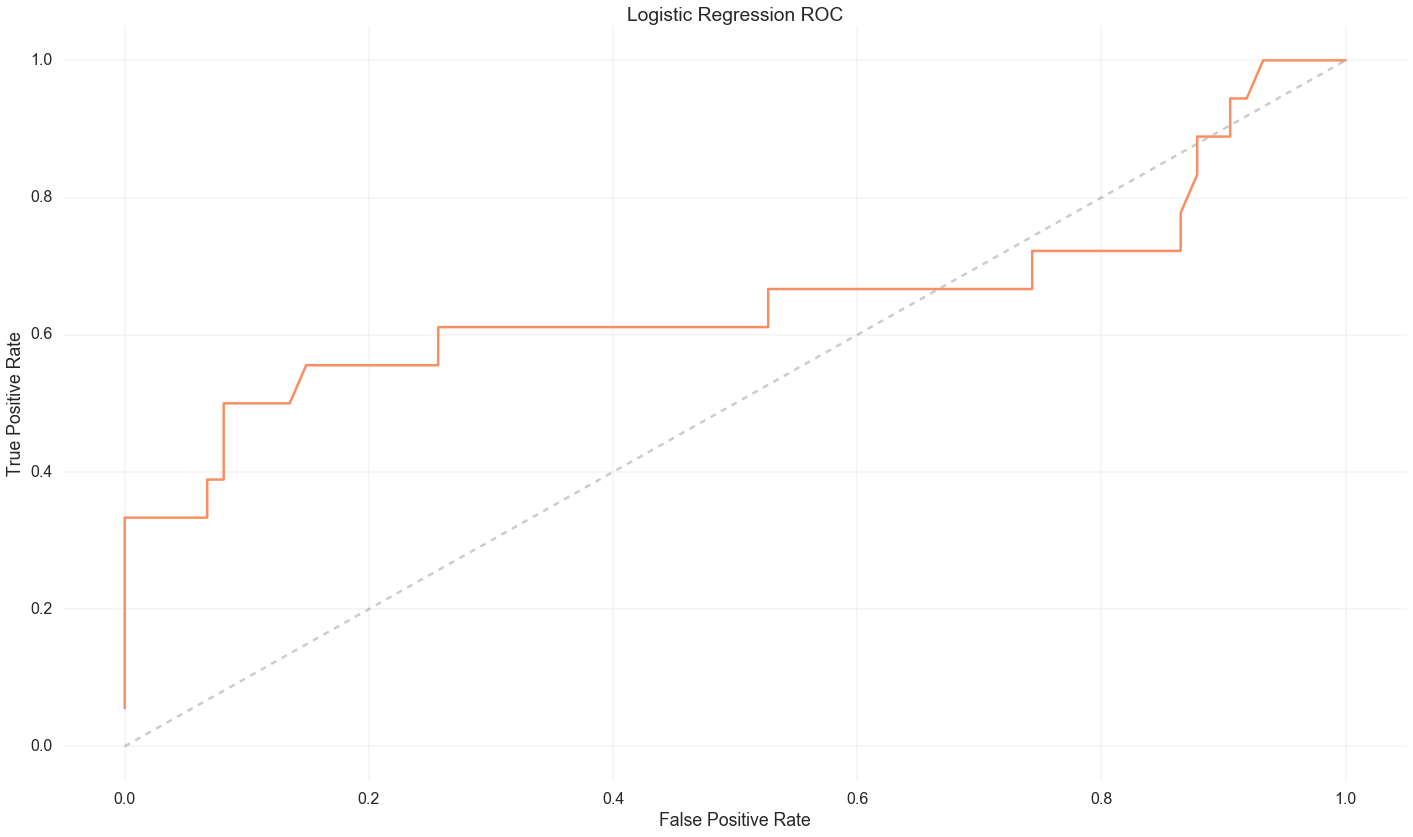

In [26]:
# make figure
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)

# plots
ax.plot([0, 1], 'k--', alpha=0.2)
ax.plot(fpr, tpr, color=colors[1])

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

# labels/titles
plt.legend(loc="best")
plt.title('Logistic Regression ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.xaxis.grid(True, alpha=0.2) 
ax.yaxis.grid(True, alpha=0.2) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

## Answer for Challenge 5 is:

<font color='blue'>Shown above</font>
___